In [2]:
'''
brew install libomp (for OSX)
pip install torchtext -U
'''
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

print('pytorch', torch.__version__)
print('torchvision', torchvision.__version__)

c:\Users\user\anaconda3\envs\harco\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pytorch 1.12.1
torchvision 0.13.1


In [3]:
IMG_SIZE = 480
THRESHOLD = 0.95

# Download Model

https://pytorch.org/docs/stable/torchvision/models.html

In [4]:
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True).eval()

c:\Users\user\anaconda3\envs\harco\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\envs\harco\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Load Image

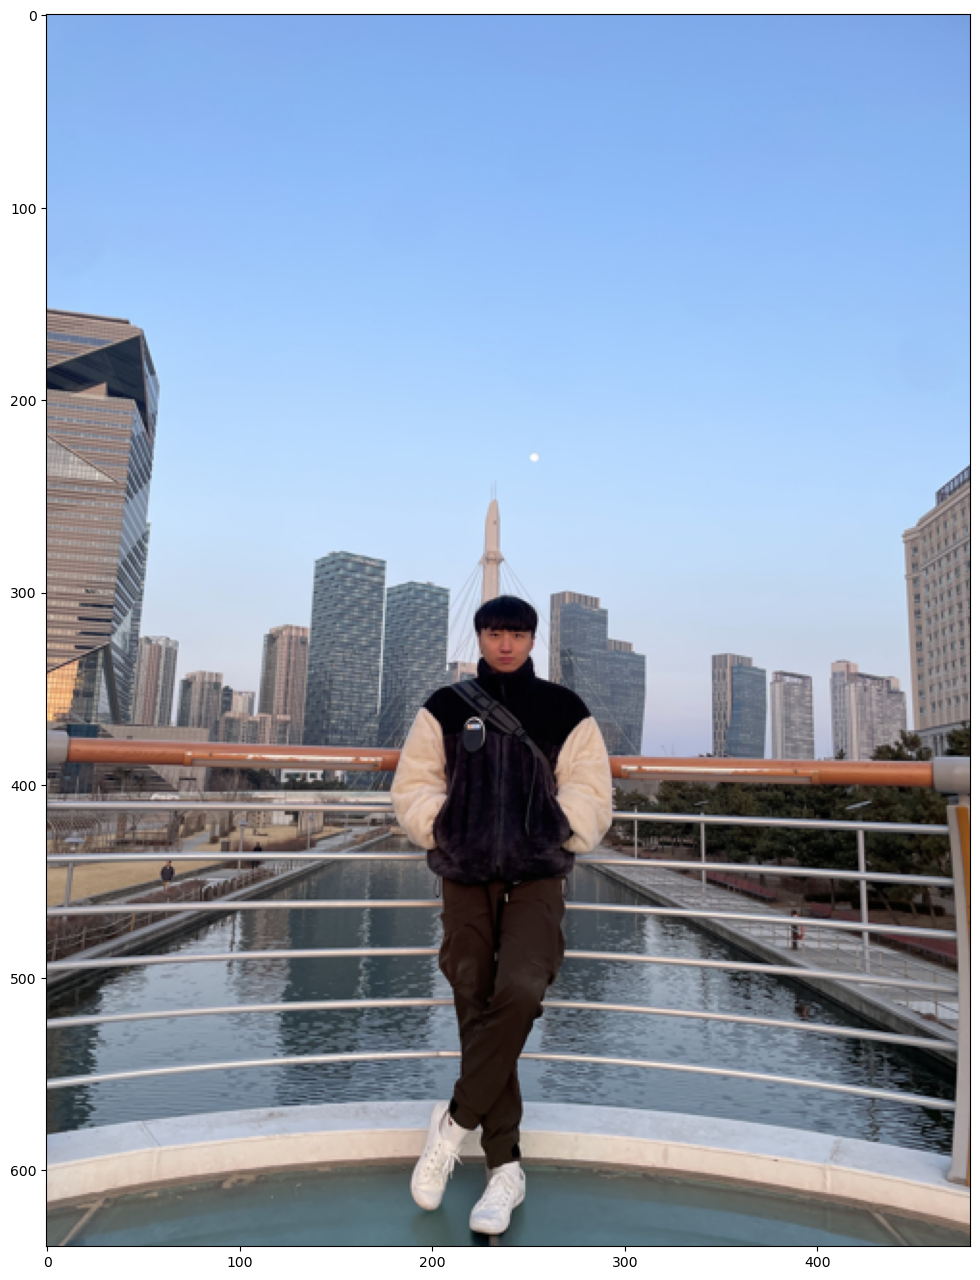

In [5]:
img = Image.open('./images/test2.jpg')
img = img.resize((IMG_SIZE, int(img.height * IMG_SIZE / img.width)))

plt.figure(figsize=(16, 16))
plt.imshow(img)

# Image to Tensor

- T.ToTensor() : Converts the image to type torch.Tensor and have values between [0, 1]

In [6]:
trf = T.Compose([
    T.ToTensor()
])

input_img = trf(img)

print(input_img.shape)

torch.Size([3, 640, 480])


# Inference

- boxes (Tensor[N, 4]): the ground-truth boxes in [x0, y0, x1, y1] format, with values between 0 and H and 0 and W
- labels (Tensor[N]): the class label for each ground-truth box
- keypoints (Tensor[N, K, 3]): the K keypoints location for each of the N instances, in the format [x, y, visibility], where visibility=0 means that the keypoint is not visible.

In [7]:
out = model([input_img])[0]

print(out.keys())

dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])


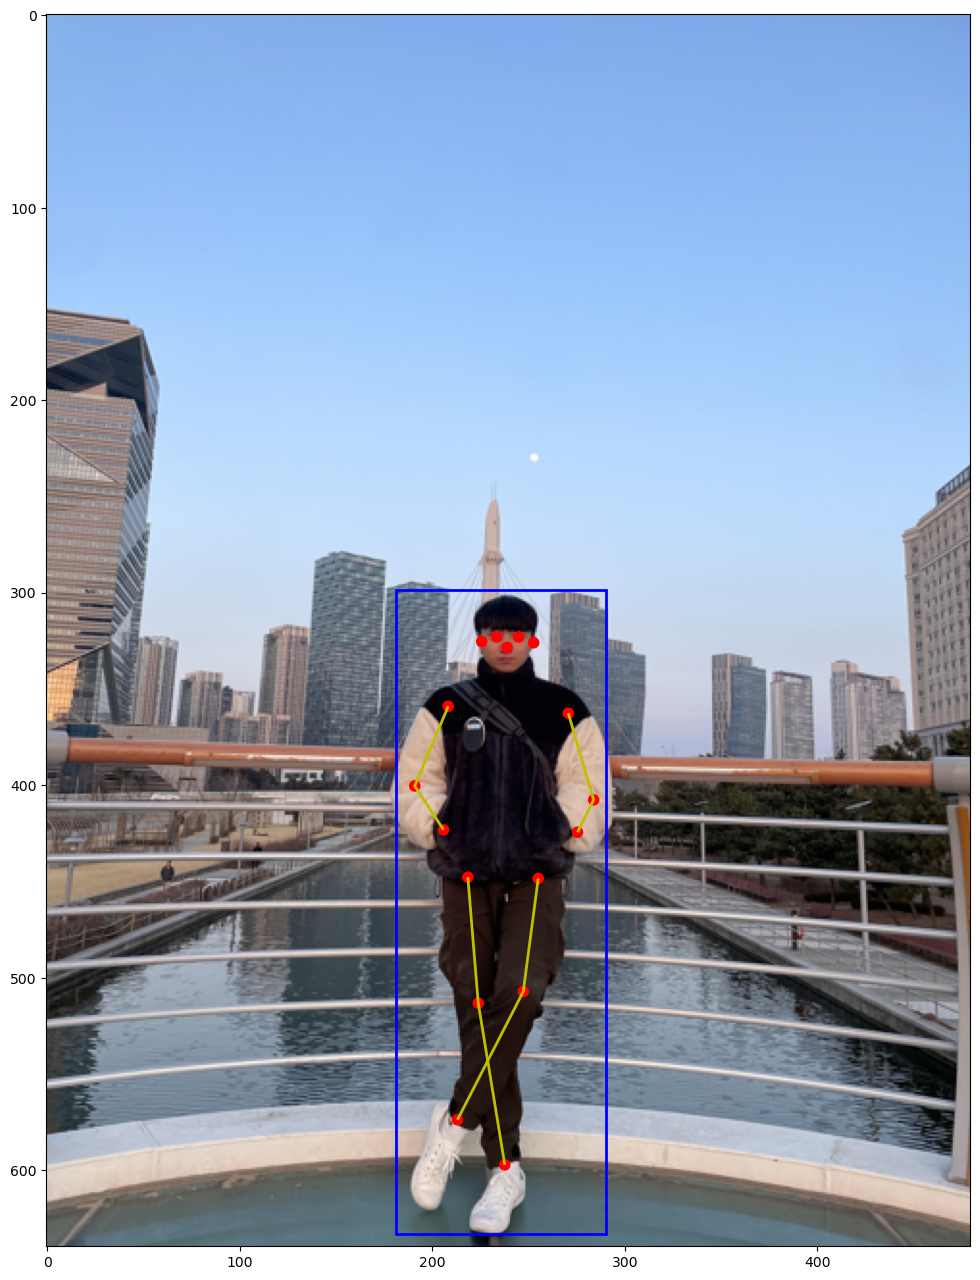

In [8]:
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO
]

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.imshow(img)

for box, score, keypoints in zip(out['boxes'], out['scores'], out['keypoints']):
    score = score.detach().numpy()

    if score < THRESHOLD:
        continue

    box = box.detach().numpy()
    keypoints = keypoints.detach().numpy()[:, :2]

    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)

    # 17 keypoints
    for k in keypoints:
        circle = patches.Circle((k[0], k[1]), radius=3, facecolor='r')
        ax.add_patch(circle)
    
    # draw path
    # left arm
    path = Path(keypoints[5:10:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='y')
    ax.add_patch(line)
    
    # right arm
    path = Path(keypoints[6:11:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='y')
    ax.add_patch(line)
    
    # left leg
    path = Path(keypoints[11:16:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='y')
    ax.add_patch(line)
    
    # right leg
    path = Path(keypoints[12:17:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='y')
    ax.add_patch(line)